In [1]:
# 数据聚合
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
from numpy.random import randn
import os
from datetime import datetime

In [2]:
# 下面开始数据聚合的学习
df = DataFrame({'key1':['a','a','b','b','a'],
                'key2':['one','two','one','two','one'],
                'data1':np.random.randn(5),
                'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.552976,1.014268
1,a,two,-0.802921,0.198198
2,b,one,-1.531369,0.956099
3,b,two,0.001539,-2.009944
4,a,one,-1.046642,-1.138042


In [3]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.5)  # 计算样本分位数，如果传入的百分位上没有值，则quantile会进行线性插值

key1
a   -0.802921
b   -0.764915
Name: data1, dtype: float64

In [4]:
# 如果你要使用自定义的聚合函数，只需将其传入agg方法就行
def peak_to_peak(arr):
    return arr.max()-arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.599618,2.152310
b,1.532908,2.966043


In [5]:
grouped.describe()   # 严格来讲，他们并非聚合运算

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.432196  0.861842 -1.046642 -0.924781 -0.802921 -0.124973   
b      2.0 -0.764915  1.083930 -1.531369 -1.148142 -0.764915 -0.381688   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.552976   3.0  0.024808  1.086581 -1.138042 -0.469922  0.198198   
b     0.001539   2.0 -0.526922  2.097309 -2.009944 -1.268433 -0.526922   

                          
           75%       max  
key1                      
a     0.606233  1.014268  
b     0.214588  0.956099

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


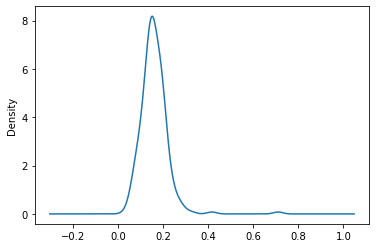

In [14]:
# 下面说一些更高级的聚合功能：
path = '../My_python_for_data_analyst\\data\\tips.csv'
tips = pd.read_csv(path)
# 添加消费占总额比的一列
tips['tip_pct'] = tips['tip']/tips['total_bill'] 
tips[:6]   # 数据前五行
tips['tip_pct'].plot(kind='kde') 
tips.head()

In [15]:
# 面向列的多函数应用
# 对不同的列使用不同的聚合函数或者是一次应用多个函数
grouped = tips.groupby(['size','smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')


size  smoker
1     No        0.159829
      Yes       0.274755
2     No        0.164996
      Yes       0.166706
3     No        0.149671
      Yes       0.157543
4     No        0.147604
      Yes       0.142036
5     No        0.178415
      Yes       0.086116
6     No        0.156229
Name: tip_pct, dtype: float64

In [16]:
# 如果传入一组函数或函数名，得到的Dataframe列就会以相应的函数命名：
grouped_pct.agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
size smoker                                  
1    No      0.159829  0.030969      0.043797
     Yes     0.274755  0.072094      0.101957
2    No      0.164996  0.042400      0.235193
     Yes     0.166706  0.090514      0.674707
3    No      0.149671  0.037872      0.155943
     Yes     0.157543  0.060374      0.174309
4    No      0.147604  0.027901      0.110822
     Yes     0.142036  0.067085      0.203076
5    No      0.178415  0.060378      0.120274
     Yes     0.086116  0.028929      0.040912
6    No      0.156229  0.042153      0.091536

In [17]:
# 如果传入的函数变为一个由(name,function)元组组成的列表，则各元组的第一个元素就会被用作DataFrame的列名：
# 可以将这种二元元组列表看做一个有序映射
grouped_pct.agg([('foo','mean'),('bar',np.std)])

foo       bar
size smoker                    
1    No      0.159829  0.030969
     Yes     0.274755  0.072094
2    No      0.164996  0.042400
     Yes     0.166706  0.090514
3    No      0.149671  0.037872
     Yes     0.157543  0.060374
4    No      0.147604  0.027901
     Yes     0.142036  0.067085
5    No      0.178415  0.060378
     Yes     0.086116  0.028929
6    No      0.156229  0.042153

In [18]:
# 还可以对不同的列应用不同的函数
functions = ['count','mean','max']
result = grouped['tip_pct','total_bill'].agg(functions)
result                   # 相当于分别对各列进行聚合，然后用concat将结果组装到一起

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
size smoker                                                         
1    No           2  0.159829  0.181728          2   8.660000  10.07
     Yes          2  0.274755  0.325733          2   5.825000   8.58
2    No          90  0.164996  0.291990         90  15.342333  26.41
     Yes         66  0.166706  0.710345         66  17.955758  40.55
3    No          26  0.149671  0.227747         26  21.009615  38.07
     Yes         12  0.157543  0.230742         12  28.191667  50.81
4    No          26  0.147604  0.192288         26  27.769231  48.33
     Yes         11  0.142036  0.280535         11  30.609091  43.11
5    No           3  0.178415  0.241663          3  30.576667  41.19
     Yes          2  0.086116  0.106572          2  29.305000  30.46
6    No           4  0.156229  0.195335          4  34.830000  48.17

In [19]:
# 与一列进行聚合时一样，这里也可以传入带有自定义名称的元组列表：
ftuples = [('Durchschnitt','mean'),('Abweichung',np.var)]
grouped['tip_pct','total_bill'].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
size smoker                                                 
1    No         0.159829   0.000959     8.660000    3.976200
     Yes        0.274755   0.005198     5.825000   15.180050
2    No         0.164996   0.001798    15.342333   19.787980
     Yes        0.166706   0.008193    17.955758   56.006726
3    No         0.149671   0.001434    21.009615   48.626804
     Yes        0.157543   0.003645    28.191667  148.641088
4    No         0.147604   0.000778    27.769231   73.843575
     Yes        0.142036   0.004500    30.609091   75.946129
5    No         0.178415   0.003645    30.576667  105.458533
     Yes        0.086116   0.000837    29.305000    2.668050
6    No         0.156229   0.001777    34.830000   88.021933

In [20]:
# 假设想要对不同的列应用不同的函数。具体是向agg传入一个从列名映射到函数的字典
group1 = grouped.agg({'tip':np.max,'size':'sum'})
print(group1)
group2 = grouped.agg({'tip_pct':['min','max','mean','std']})
group2 
# 只有将多个函数应用到至少一列时，DataFrame才会拥有层次化的列

tip  size
size smoker             
1    No       1.83     2
     Yes      1.92     2
2    No       5.85   180
     Yes      5.65   132
3    No       5.92    78
     Yes     10.00    36
4    No       9.00   104
     Yes      6.50    44
5    No       5.14    15
     Yes      3.00    10
6    No       6.70    24


tip_pct                              
                  min       max      mean       std
size smoker                                        
1    No      0.137931  0.181728  0.159829  0.030969
     Yes     0.223776  0.325733  0.274755  0.072094
2    No      0.056797  0.291990  0.164996  0.042400
     Yes     0.035638  0.710345  0.166706  0.090514
3    No      0.071804  0.227747  0.149671  0.037872
     Yes     0.056433  0.230742  0.157543  0.060374
4    No      0.081466  0.192288  0.147604  0.027901
     Yes     0.077459  0.280535  0.142036  0.067085
5    No      0.121389  0.241663  0.178415  0.060378
     Yes     0.065660  0.106572  0.086116  0.028929
6    No      0.103799  0.195335  0.156229  0.042153

In [23]:
# 以无索引的形式返回聚合数据
# 可以向groupby传入as_index=False以禁用该功能
grouped_new = tips.groupby(['size','smoker'],as_index=False).mean()
grouped_new

,size,smoker,total_bill,tip,tip_pct
0,1,No,8.660000,1.415000,0.159829
1,1,Yes,5.825000,1.460000,0.274755
2,2,No,15.342333,2.489000,0.164996
3,2,Yes,17.955758,2.709545,0.166706
4,3,No,21.009615,3.069231,0.149671
5,3,Yes,28.191667,4.095000,0.157543
6,4,No,27.769231,4.195769,0.147604
7,4,Yes,30.609091,3.992727,0.142036
8,5,No,30.576667,5.046667,0.178415
9,5,Yes,29.305000,2.500000,0.086116
